## Set Up 

In [1]:
from pythonosc import dispatcher, osc_server
from pythonosc.udp_client import SimpleUDPClient
import time

from bitalino import BITalino
import biofeatures

In [2]:
bitalino_ip = '192.168.0.101'
bitalino_port = 31000

actuator_ip = '192.168.0.100'
actuator_port = 12000

osc_client = SimpleUDPClient(actuator_ip, actuator_port) 


In [3]:
def process_riot_data(unused_addr, *values):
    global resp_data, last_update, client, inflated, inflating, deflating
        
    new_data = values[12]
    resp_data.append(new_data)
        
    if len(resp_data) > 200*10 and time.time() - last_update > update_freq:
        last_int, breathe_in = biofeatures.resp_intervals(resp_data, sampling_rate = 200, last_breath = True)
                
        if breathe_in:
            print("Breathing in")
            client.send_message("/actuator/inflate", 100.0)
            inflating = True
            deflating = False
        else:
            print("Breathing out")
            client.send_message("/actuator/inflate", -100.0)
            deflating = True
            inflating = False
        
        last_update = time.time()
    
    # only save the last 5 min of data
    if len(resp_data) > 200 * 60 * 5:
        resp_data = resp_data[-200*60*5:]

In [4]:
def handle_pressure(unused_addr, pressure):
    global client, inflated, inflating, deflating, stop_flag, pressure_readings, pressure_readings_wearable, t0, wearable
    print(pressure)
    
    if time.time() - t0 > 30:
        stop_flag = False
        wearable = False
        t0 = time.time()
    
    if stop_flag:
        if wearable:
            pressure_readings_wearable.append(pressure)
        else:
            pressure_readings.append(pressure)
        return
    
    if pressure < 800:
        print("Fully deflated!")
        client.send_message("/actuator/inflate", 0.0)
        deflating = False
    
    elif deflating and pressure > 1000:
        print("Squeeze!")
        
    elif pressure > 1150:
        print("Careful!")
        client.send_message("/actuator/inflate", 0.0)
        t0 = time.time()
        stop_flag = True
       # deflating = True
        
    elif not deflating:
        client.send_message("/actuator/inflate", 70.0)

In [5]:
import pythonosc
import time

dispatcher2 = pythonosc.dispatcher.Dispatcher()
dispatcher2.map("/sensor/pressure", handle_pressure)

client = SimpleUDPClient(actuator_ip, actuator_port) 

inflated = False
inflating = False
deflating = False
stop_flag = False

pressure_readings_wearable = []
pressure_readings = []
wearable = True
t0 = time.time()

server = osc_server.ThreadingOSCUDPServer((bitalino_ip, bitalino_port), dispatcher2)
print("Serving on {}".format(server.server_address))
server.serve_forever()

Serving on ('192.168.0.101', 31000)
1067.1209716796875
1078.594970703125
1100.390380859375
1103.464111328125
1105.4696044921875
1097.0433349609375
1103.862548828125
1102.03515625
1096.0633544921875
1106.37353515625
1102.5947265625
1103.9075927734375
1107.31005859375
1099.9739990234375
1106.384765625
1109.8138427734375
1102.812255859375
1111.7490234375
1111.710693359375
1106.5869140625
1115.97900390625
1111.1259765625
1110.8636474609375
1116.4952392578125
1109.7965087890625
1117.73486328125
1116.42236328125
1110.5404052734375
1121.160888671875
1118.34521484375
1119.152587890625
1122.673828125
1115.3206787109375
1124.6219482421875
1125.1048583984375
1117.9427490234375
1127.8114013671875
1122.4385986328125
1127.0673828125
1130.213623046875
1122.3388671875
1133.3140869140625
1126.635009765625
1136.8890380859375
1134.3291015625
1133.0389404296875
1137.705322265625
1129.3663330078125
1140.3326416015625
1133.769287109375
1139.59033203125
1137.1922607421875
1137.0704345703125
1142.482421875
11

1076.029052734375
1076.502197265625
1077.0810546875
1076.3294677734375
1075.3780517578125
1074.5633544921875
1074.031982421875
1073.822021484375
1073.32275390625
1072.851318359375
1072.4287109375
1072.0093994140625
1071.6910400390625
1071.4122314453125
1070.763427734375
1069.8455810546875
1068.323486328125
1066.843505859375
1066.189453125
1065.701171875
1066.12841796875
1066.890625
1067.434326171875
1067.31640625
1067.396728515625
1067.3046875
1067.24462890625
1067.1395263671875
1067.2791748046875
1067.390380859375
1067.6480712890625
1068.3211669921875
1071.307861328125
1068.6129150390625
1068.8001708984375
1069.4835205078125
1070.3807373046875
1070.8193359375
1071.5999755859375
1072.0047607421875
1072.9664306640625
1074.0814208984375
1075.0753173828125
1076.126220703125
1076.748291015625
1077.70703125
1078.542724609375
1078.8958740234375
1079.52978515625
1080.4095458984375
1080.5230712890625
1080.713623046875
1081.18505859375
1082.1240234375
1082.8304443359375
1083.189208984375
1082.6

1120.1265869140625
1108.11376953125
1123.3402099609375
1121.9951171875
1122.8902587890625
1120.401611328125
1119.283203125
1118.5308837890625
1119.20361328125
1116.82080078125
1115.8448486328125
1114.9798583984375
1114.5498046875
1113.5550537109375
1112.8470458984375
1112.130126953125
1111.349853515625
1110.7432861328125
1110.1041259765625
1109.4193115234375
1108.7646484375
1108.1787109375
1107.480224609375
1106.8392333984375
1106.2161865234375
1105.7237548828125
1105.04345703125
1104.4813232421875
1103.8685302734375
1103.443115234375
1102.853759765625
1102.32080078125
1101.7618408203125
1101.197021484375
1100.59033203125
1100.228515625
1099.741943359375
1099.2432861328125
1098.773193359375
1098.327880859375
1097.94140625
1097.3297119140625
1096.810546875
1096.39111328125
1095.750244140625
1095.3753662109375
1094.278076171875
1093.951171875
1093.4764404296875
1093.0506591796875
1092.6077880859375
1092.3125
1091.807861328125
1091.4337158203125
1090.907958984375
1090.632568359375
1090.18

1037.6546630859375
1037.5941162109375
1039.261962890625
1037.5450439453125
1037.357421875
1037.5911865234375
1037.533935546875
1038.468994140625
1040.773193359375
1037.091796875
1037.1307373046875
1037.2103271484375
1036.9947509765625
1036.928466796875
1036.8773193359375
1036.8697509765625
1036.84375
1036.961181640625
1036.9974365234375
1036.8985595703125
1036.7640380859375
1036.831787109375
1036.994873046875
1036.7427978515625
1036.7703857421875
1036.6767578125
1036.704345703125
1036.688232421875
1036.6715087890625
1036.6231689453125
1036.7257080078125
1036.541259765625
1036.71923828125
1036.6048583984375
1036.5494384765625
1036.55810546875
1036.4683837890625
1036.27734375
1036.3841552734375
1036.3936767578125
1036.4305419921875
1036.162353515625
1036.1446533203125
1036.064453125
1036.1978759765625
1036.1239013671875
1036.1236572265625
1035.9620361328125
1036.0008544921875
1036.1026611328125
1036.080810546875
1037.821533203125
1035.857666015625
1035.883056640625
1035.781005859375
1035

KeyboardInterrupt: 

In [11]:
client = SimpleUDPClient(actuator_ip, actuator_port) 

client.send_message("/actuator/inflate", 10.0)

In [15]:
client = SimpleUDPClient('192.168.0.101', 32000) 

client.send_message("/actuator/1/inflate", 0.0)

In [1]:
# deflating: 970
# deflating when empty: <800
# neutral empty: 1016
# neutral full: 1050 going down slowly to 1020
# inflating: 1068-1200
# squeezed: 1050 - 1200


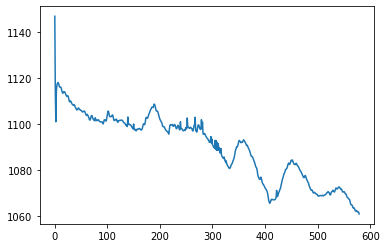

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pressure_readings_wearable)

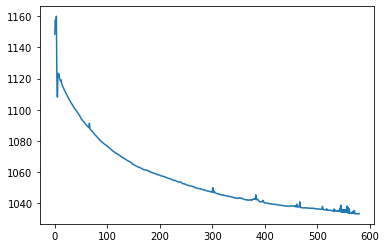

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pressure_readings)

In [9]:
import numpy as np

readings = np.array(pressure_readings_wearable) - np.array(pressure_readings[:580])

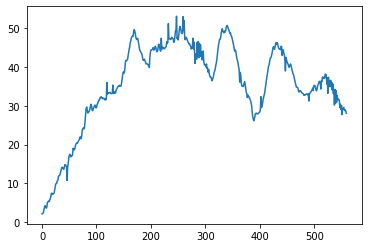

In [10]:
plt.plot(readings[20:])